## Job Change of Data Scientists: Classification

Dataset Source: https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists

#### Install Necessary Libraries

In [1]:
%pip install -U matplotlib
%pip install -U numpy
%pip install auto-sklearn
%pip install seaborn sklearn imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.24.2-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.1 requires scikit-learn>=1.0.2, but you have scikit-learn 0.24.2 which is incompatible.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab

#### Import Necessary Libraries

In [2]:
import os, sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import autosklearn
from autosklearn.classification import AutoSklearnClassifier

#### Display Library Versions

In [3]:
n = 18

print(f"Language/Library".rjust(n-2), '|', 'Version')
print('-' * (n-2), '|', '--------')
print("Python :".rjust(n), sys.version[0:6])
print("NumPy :".rjust(n), np.__version__)
print("Pandas :".rjust(n), pd.__version__)
print("Sklearn :".rjust(n), sklearn.__version__)
print("Seaborn :".rjust(n), sns.__version__)
print("Auto-Sklearn :".rjust(n), autosklearn.__version__)

Language/Library | Version
---------------- | --------
          Python : 3.10.1
           NumPy : 1.25.0
          Pandas : 1.5.3
         Sklearn : 1.2.2
         Seaborn : 0.12.2
    Auto-Sklearn : 0.15.0


#### Mount Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Ingest Training Dataset

In [5]:
col_names = ["enrollee_id",
             "city",
             "city_development_index",
             "gender",
             "relevant_experience",
             "enrolled_university",
             "education_level",
             "major_discipline",
             "experience",
             "company_size",
             "company_type",
             "last_new_job",
             "training_hours",
             "target"]

data_types = {"enrollee_id": np.uint32,
          "city": 'category',
          "city_development_index": np.float16,
          "gender": 'category',
          "relevant_experience": 'category',
          "enrolled_university": 'category',
          "education_level": 'category',
          "major_discipline": 'category',
          "experience": 'category',
          "company_size": 'category',
          "company_type": 'category',
          "last_new_job": 'category',
          "training_hours": np.uint16,
          "target": np.uint8}

data_file = "/content/drive/MyDrive/HR Analytics - Job Change of Data Scientists/aug_train.csv"

data = pd.read_csv(data_file,
                   names=col_names,
                   dtype=data_types,
                   engine='c',
                   header=0)

data

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.919922,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.775879,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624023,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789062,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767090,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.877930,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1
19154,31398,city_103,0.919922,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1
19155,24576,city_103,0.919922,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0
19156,5756,city_65,0.801758,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0


#### More Insights into Dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             19158 non-null  uint32  
 1   city                    19158 non-null  category
 2   city_development_index  19158 non-null  float16 
 3   gender                  14650 non-null  category
 4   relevant_experience     19158 non-null  category
 5   enrolled_university     18772 non-null  category
 6   education_level         18698 non-null  category
 7   major_discipline        16345 non-null  category
 8   experience              19093 non-null  category
 9   company_size            13220 non-null  category
 10  company_type            13018 non-null  category
 11  last_new_job            18735 non-null  category
 12  training_hours          19158 non-null  uint16  
 13  target                  19158 non-null  uint8   
dtypes: category(10), float

#### Handling Enrollee ID

In [7]:
"""
Since the enrollee_id has the same number of unique values as
there are samples in the dataset, enrollee_id is essentially
a duplicate index; therefore, I am going to drop it.
"""
if 'enrollee_id' in data.columns:
    data = data.drop('enrollee_id', axis=1)

#### Descriptive Statistics of Dataset

In [8]:
data.describe(include='all')

,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158,19158.000000,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158.000000,19158.000000
unique,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,4355,NaN,13221,13792,13817,11598,14492,3286,3083,9817,8040,NaN,NaN
mean,NaN,0.829102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.366896,0.249348
std,NaN,0.123352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.058462,0.432647
min,NaN,0.447998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,NaN,0.740234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,NaN,0.902832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,NaN,0.919922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.000000


#### Create Function for Visualizing Features (Histogram)

In [9]:
def histogram_visual(feature_to_visualize: pd.Series,
                     num_of_bins: int,
                     plot_title: str,
                     x_label: str,
                     x_start: float = -1.0,
                     y_label: str = "# of Samples",
                     ):
    """
    This function returns a histogram for a feature.

    Inputs:
    - feature_to_visualize: Feature to plot in the form
    of pandas Series.
    - plot_title: The title of the plot/visual.
    - x_label: The string label value for the x label.
    - x_start: To force the x-axis of the visual to start at
    a specified value instead of the automatically generated
    value, assign the float value here. Otherwise, the
    autogenerated start value will be used.
    - y_label: The string label value for the y label.

    Output:
    - A histogram.
    """

    assert type(feature_to_visualize) == pd.Series, \
        "Make sure the dataset input type is a Pandas Series."
    assert type(plot_title) != 'str', \
        "The title value must be a string value."
    assert type(x_label) !=  'str', \
        "The x label value must be a string value."
    assert type(y_label) != 'str', \
        "The y label value must be a string value."
    assert type(x_start) != 'float', \
        "The x_start value must be a float value."

    ax = feature_to_visualize.hist(grid=False,
                                   bins=num_of_bins,
                                   figsize=(18, 8))
    plt.suptitle('')
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    if x_start != -1:
        plt.xlim([0, (max(feature_to_visualize) + (1/num_of_bins))])

    plt.show()

#### Data Visualization: City Development Index

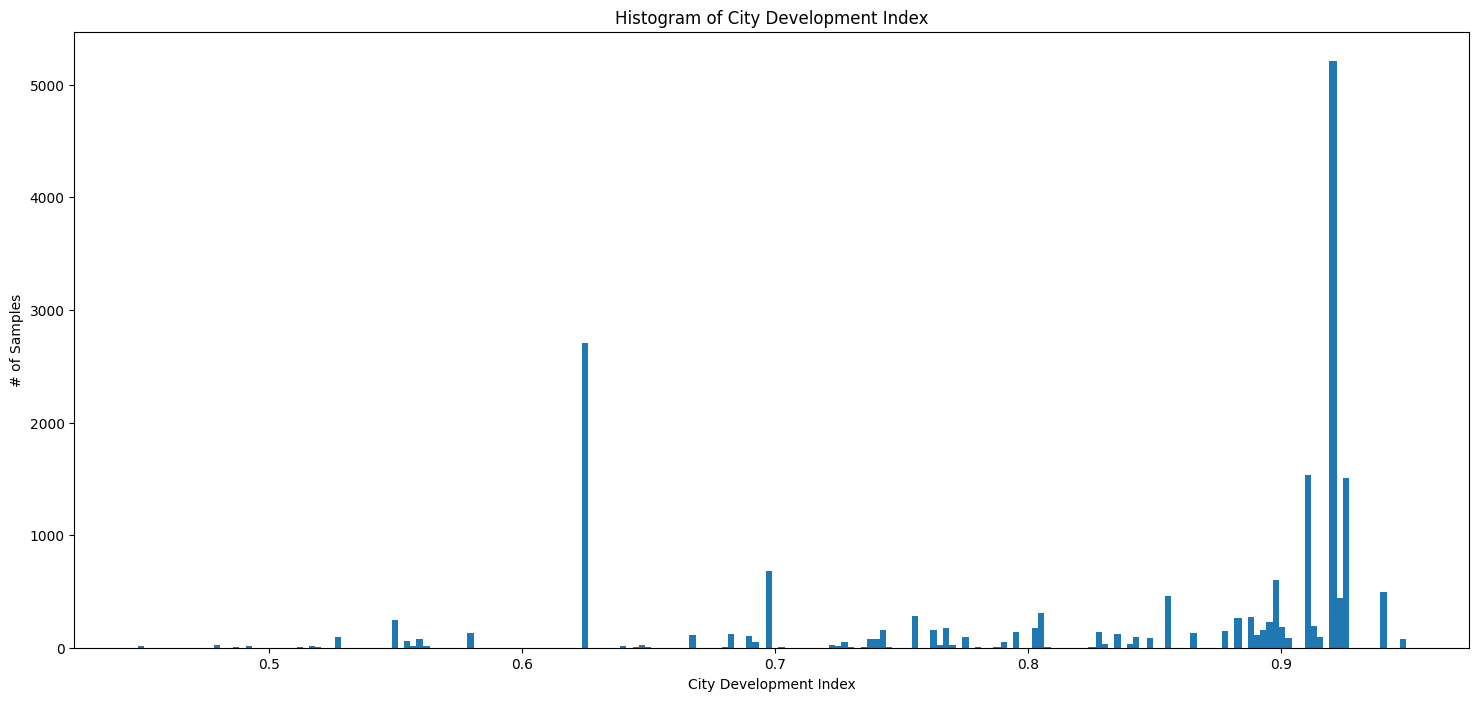

The City Development Index ranges from 0.447998046875 to 0.94921875.


In [10]:
histogram_visual(data['city_development_index'],
                 num_of_bins=200,
                 plot_title="Histogram of City Development Index",
                 x_label="City Development Index")

print(f"The City Development Index ranges from " +
      f"{min(data['city_development_index'])} " +
      f"to {max(data['city_development_index'])}.")

#### Data Visualization: Training Hours

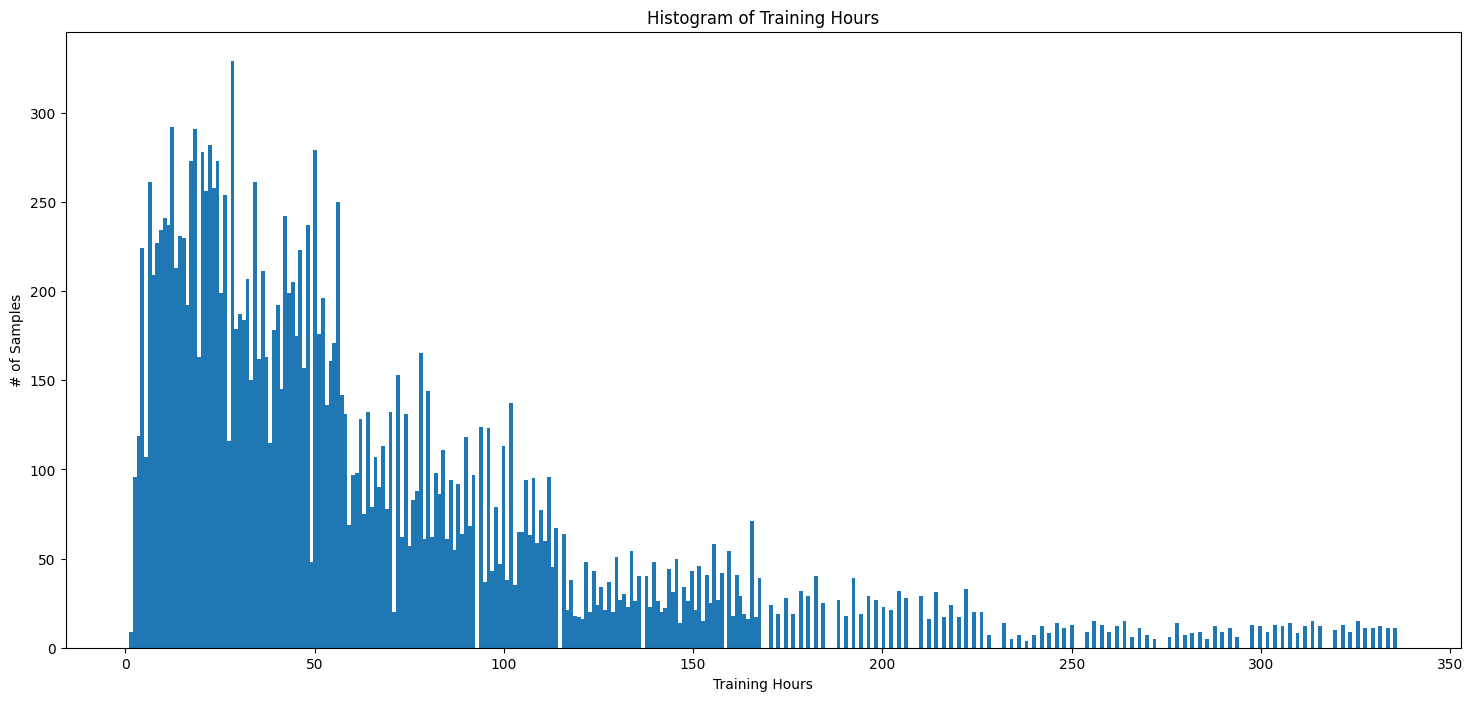

Training Hours ranges from 1 to 336.


In [11]:
histogram_visual(data['training_hours'],
                 num_of_bins=337,
                 plot_title="Histogram of Training Hours",
                 x_label="Training Hours")

print(f"Training Hours ranges from " +
      f"{min(data['training_hours'])} " +
      f"to {max(data['training_hours'])}.")

#### Create Function to Visualize Features (Barplot)

In [12]:
def barplot_visual(feature_to_visualize: pd.Series,
                   plot_title: str,
                   x_label: str,
                   y_label: str = "# of Samples",
                   annotations: int = 1
                   ):
    """
    This function returns a histogram for a feature.

    Inputs:
    - feature_to_visualize: Feature to plot in the form
    of pandas Series.
    - plot_title: The title of the plot/visual.
    - x_label: The string label value for the x label.
    - y_label: The string label value for the y label.
    - annotation: Whether to display count of each
        unique value in barchart

    Output:
    - A Bar Plot.
    """

    assert type(feature_to_visualize) == pd.Series, \
        "Make sure the dataset input type is a Pandas Series."
    assert type(plot_title) != 'str', \
        "The title value must be a string value."
    assert type(x_label) !=  'str', \
        "The x label value must be a string value."
    assert type(y_label) != 'str', \
        "The y label value must be a string value."
    assert annotations == 0 or annotations == 1, \
        "The annotations value must be either a 0 or 1 (integer)."

    ax = feature_to_visualize.value_counts().sort_values().plot.bar(
                                                      figsize=(12,8),
                                                      rot=0,
                                                      legend=False,
                                                      color=["lightgreen",
                                                             "blue",
                                                             "brown",
                                                             "lightblue",
                                                             "tan",
                                                             "yellow",
                                                             "orange",
                                                             "green",
                                                             "red",
                                                             "purple"]
                                                      )

    if annotations:
        ax.bar_label(ax.containers[0])

    plt.suptitle('')
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.show()

#### Dataset Visualization: City

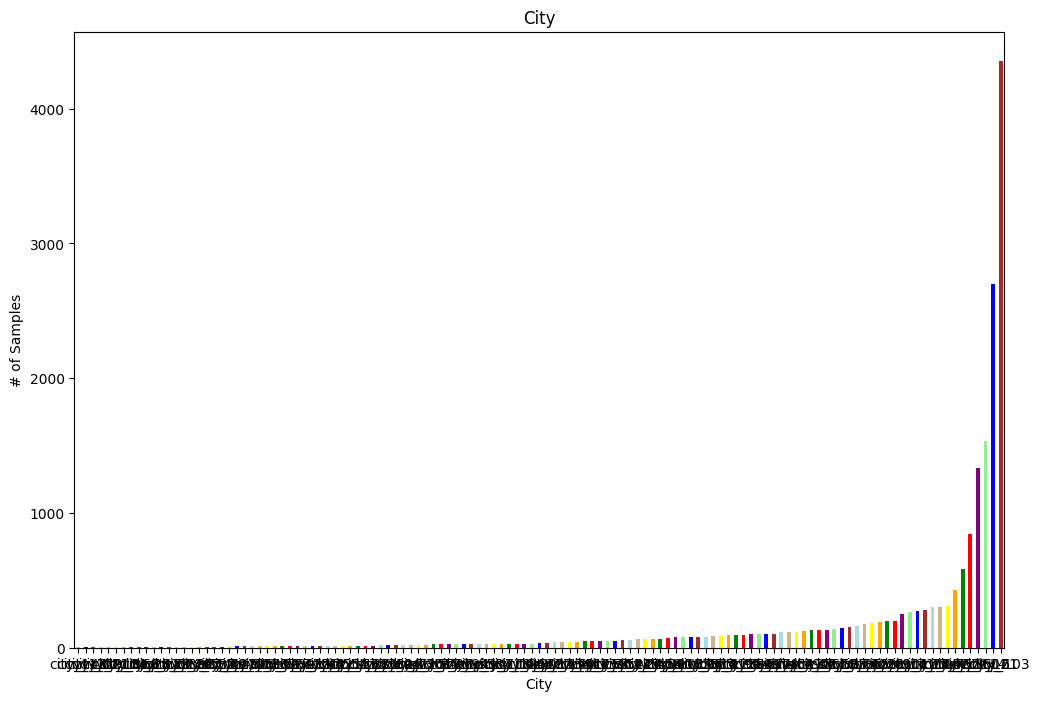

In [13]:
barplot_visual(data["city"],
               "City",
               "City",
               "# of Samples",
               annotations=0
               )

#### Dataset Visualization: Gender

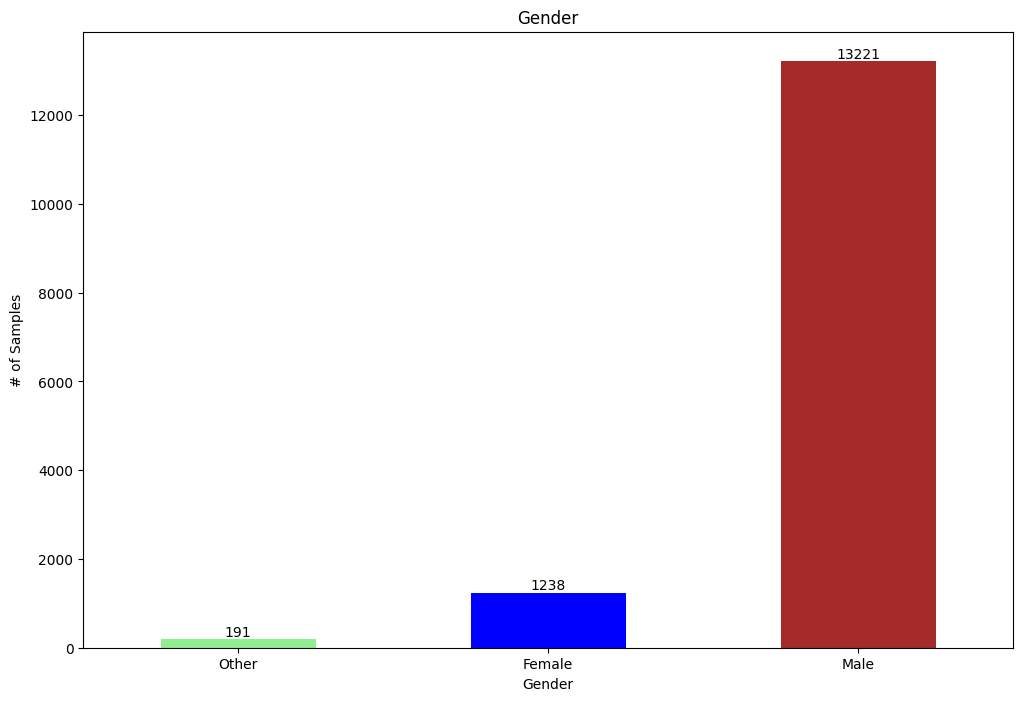

In [14]:
barplot_visual(data["gender"],
               "Gender",
               "Gender",
               "# of Samples",
               )

#### Dataset Visualization: Does Employee Have Relevant Experience?

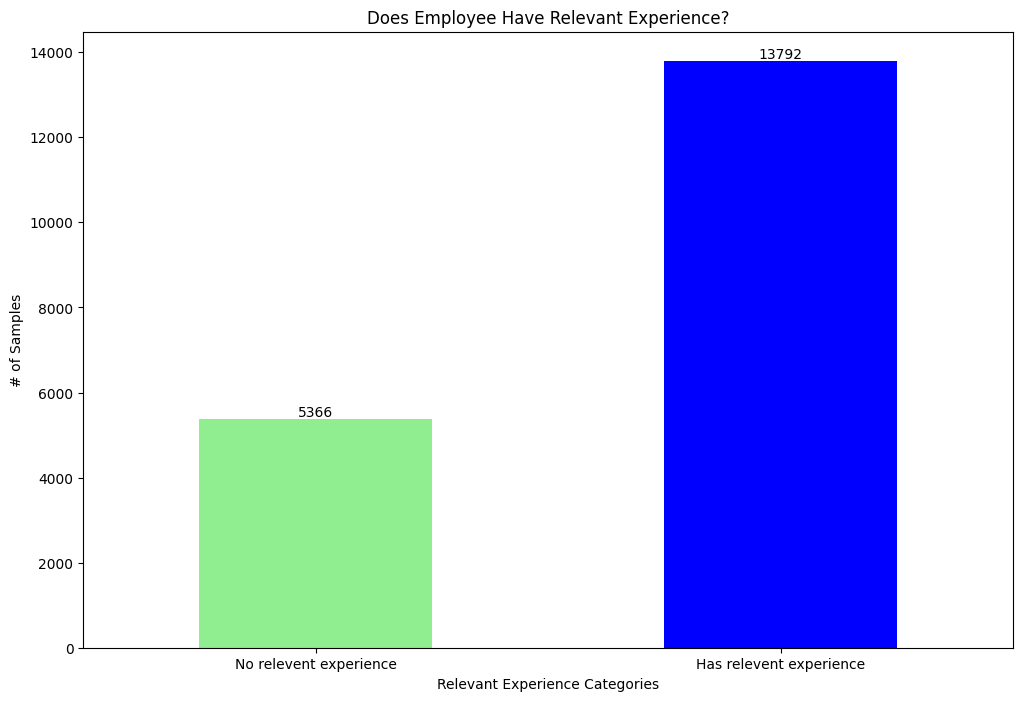

In [15]:
barplot_visual(data["relevant_experience"],
               "Does Employee Have Relevant Experience?",
               "Relevant Experience Categories",
               "# of Samples",
               )

#### Dataset Visualization: University Enrollment Status

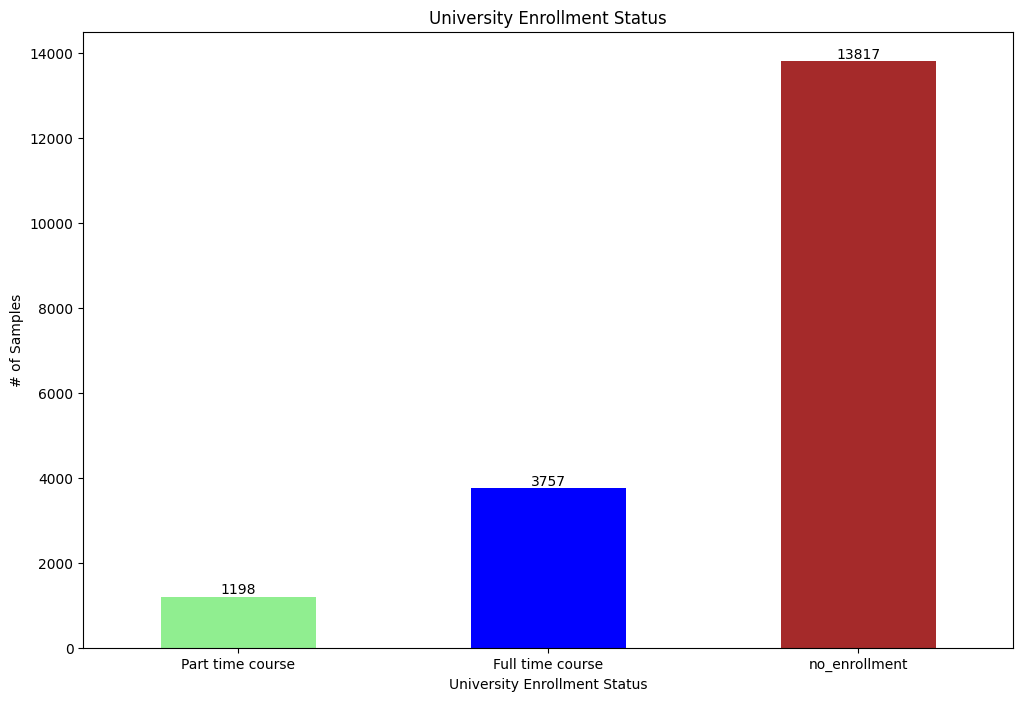

In [16]:
barplot_visual(data["enrolled_university"],
               "University Enrollment Status",
               "University Enrollment Status",
               "# of Samples",
               )

#### Dataset Visualization: Education Level

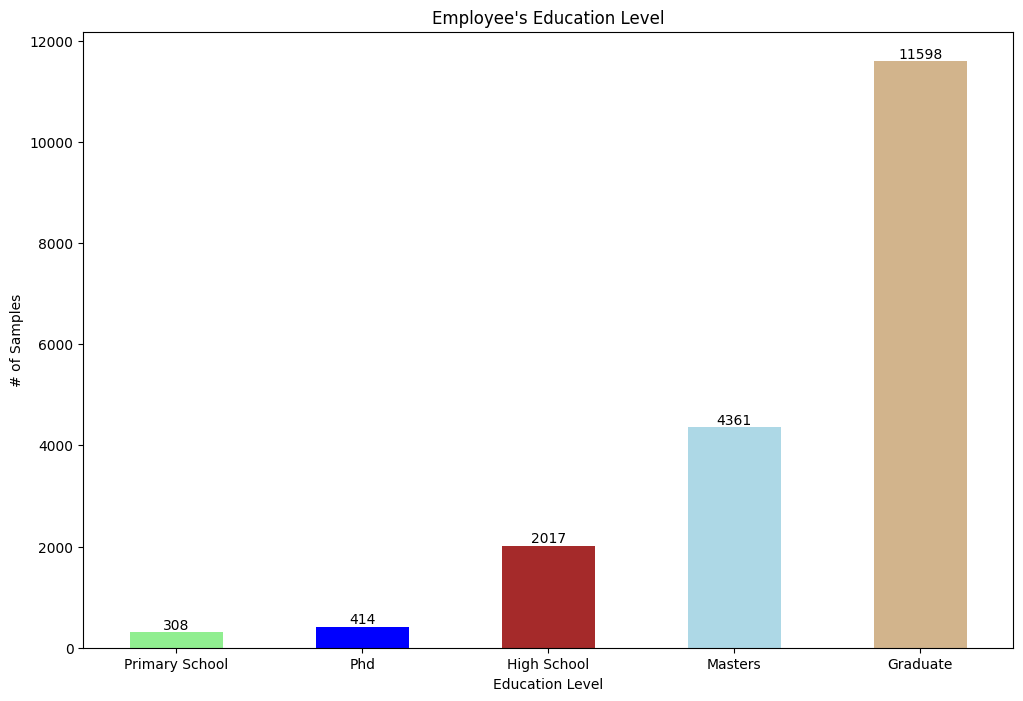

In [17]:
barplot_visual(data["education_level"],
               "Employee's Education Level",
               "Education Level",
               "# of Samples",
               )

#### Dataset Visualization: Employee's Major Discipline

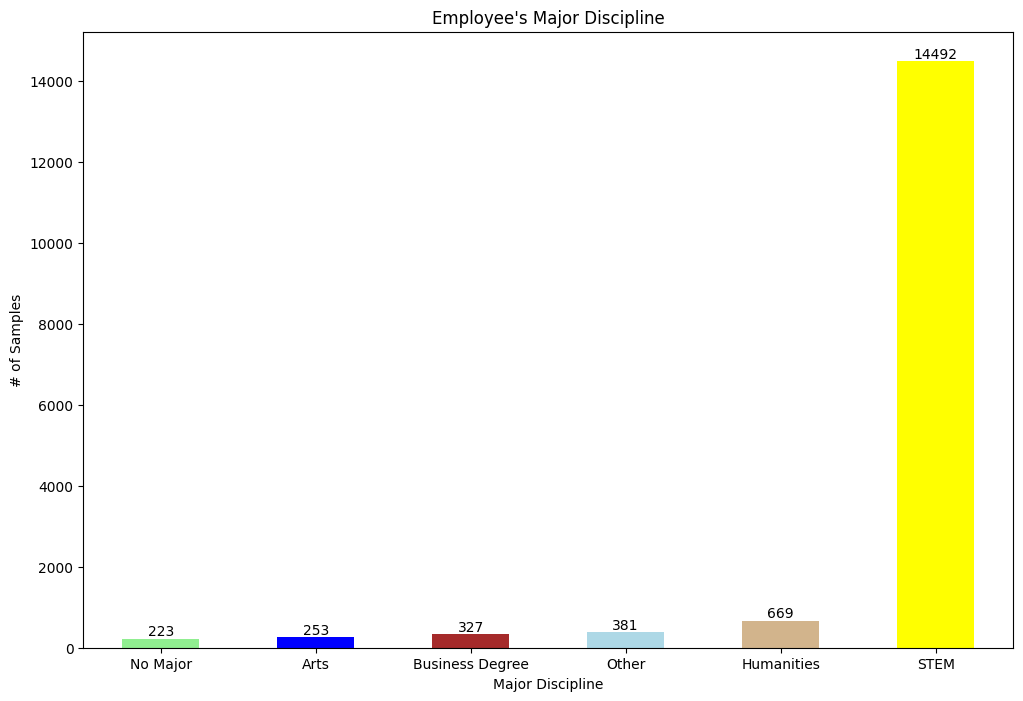

In [18]:
barplot_visual(data["major_discipline"],
               "Employee's Major Discipline",
               "Major Discipline",
               "# of Samples",
               )

#### Dataset Visualization: Employee's Overall Experience Level

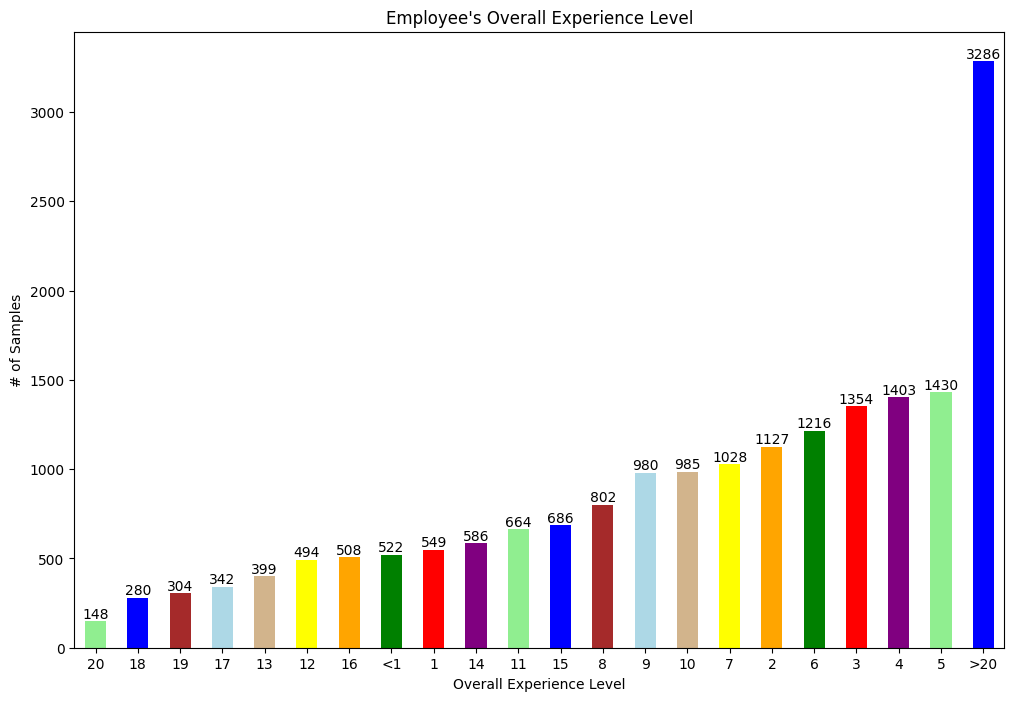

In [19]:
barplot_visual(data["experience"],
               "Employee's Overall Experience Level",
               "Overall Experience Level",
               "# of Samples",
               )

#### Dataset Visualization: Company Size

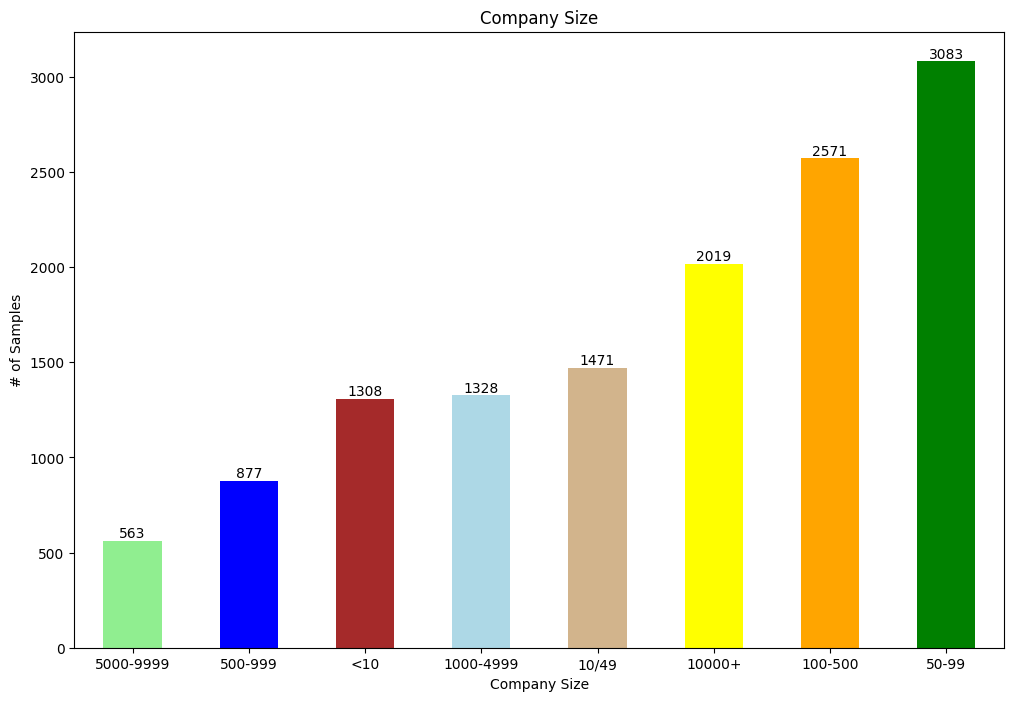

In [20]:
barplot_visual(data["company_size"],
               "Company Size",
               "Company Size",
               "# of Samples",
               )

#### Dataset Visualization: Company Type

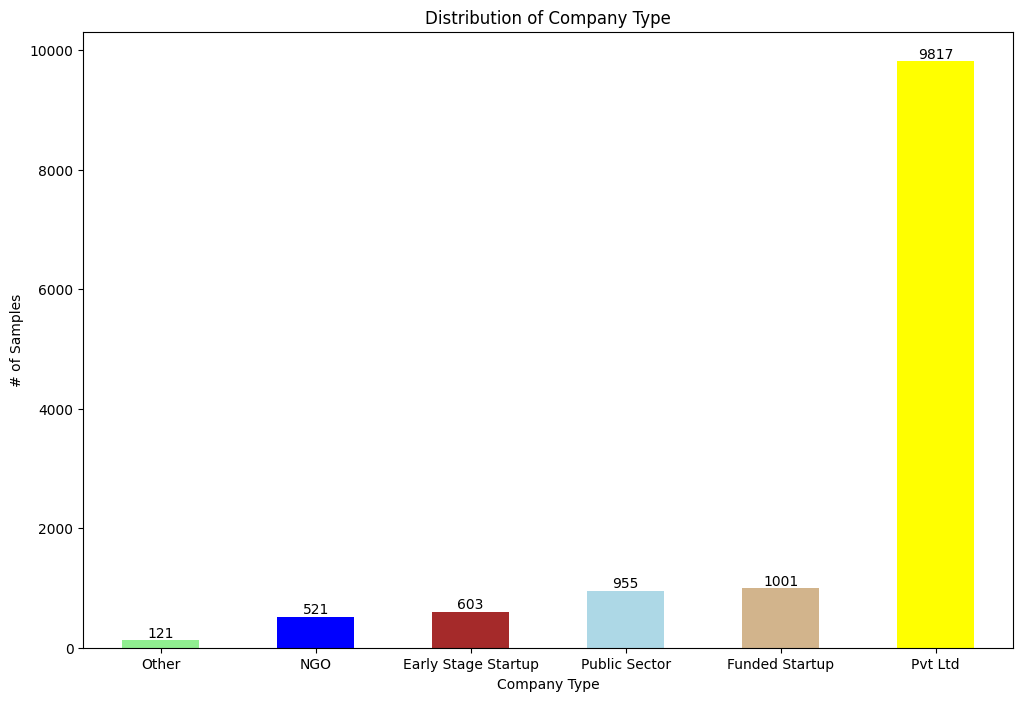

In [21]:
barplot_visual(data["company_type"],
               "Distribution of Company Type",
               "Company Type",
               "# of Samples",
               )

#### Dataset Visualization: Last New Job

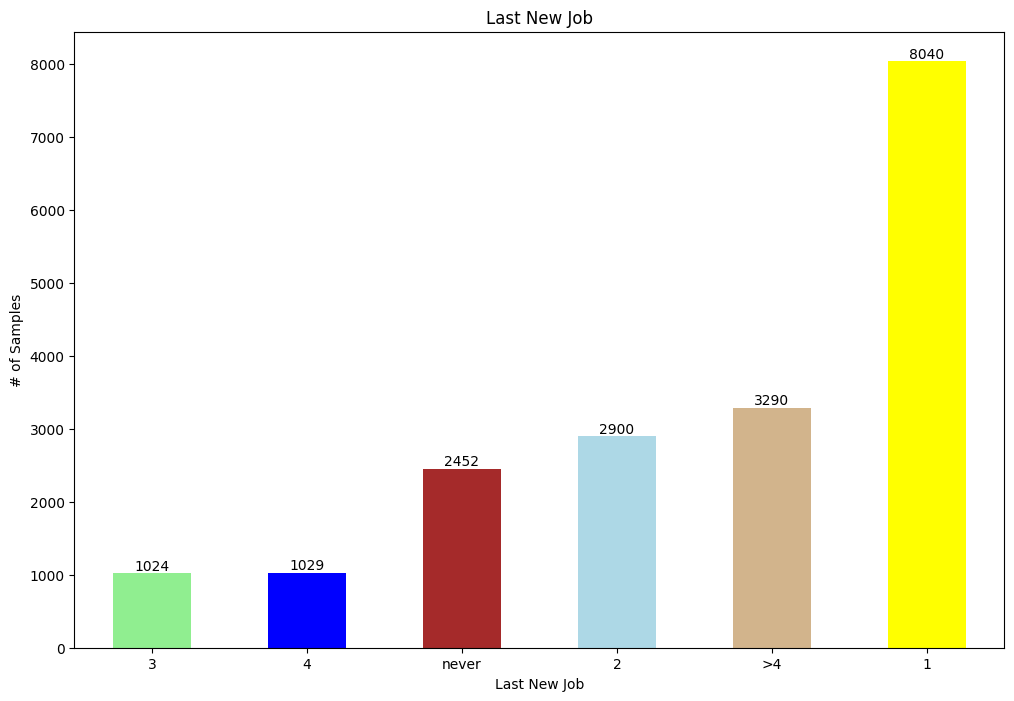

In [22]:
barplot_visual(data["last_new_job"],
               "Last New Job",
               "Last New Job",
               "# of Samples",
               )

#### Dataset Visualization: Target

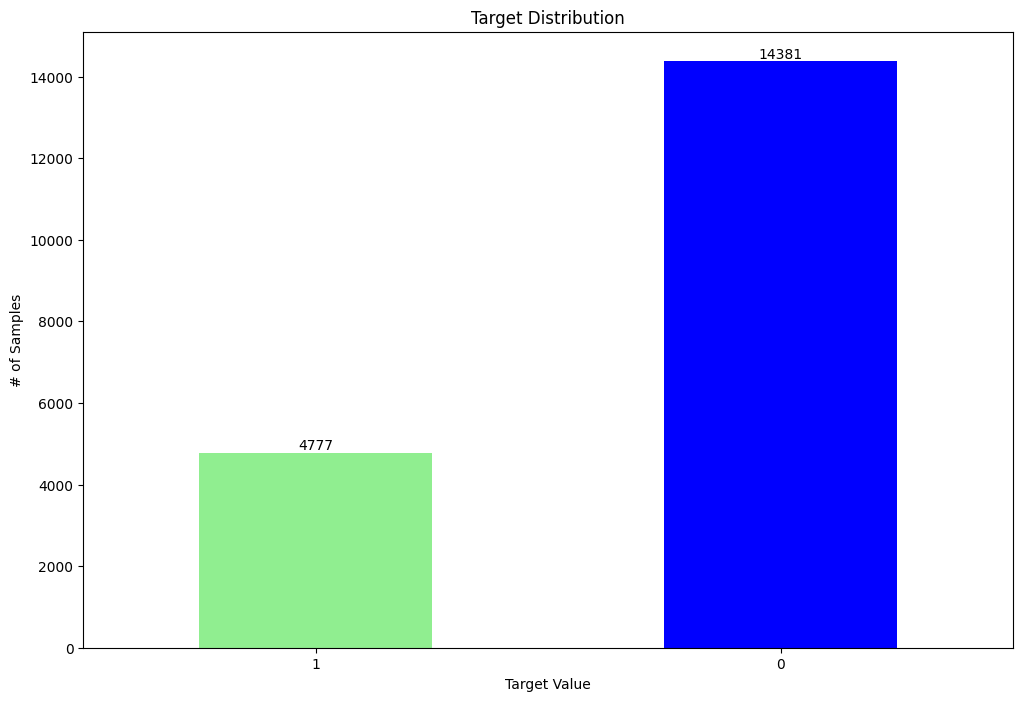

In [23]:
barplot_visual(data["target"],
               "Target Distribution",
               "Target Value",
               "# of Samples",
               )

#### Descriptive Statistics

In [24]:
data.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.99], include='all')

,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158,19158.000000,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158.000000,19158.000000
unique,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,4355,NaN,13221,13792,13817,11598,14492,3286,3083,9817,8040,NaN,NaN
mean,NaN,0.829102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.366896,0.249348
std,NaN,0.123352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.058462,0.432647
min,NaN,0.447998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
1%,NaN,0.549805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000
10%,NaN,0.624023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,0.000000
25%,NaN,0.740234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000


### Prepare Shared Pipeline Data & Stages/Steps

#### Split Dataset into Training & Testing Datasets

In [25]:
y = data['target']
X = data.drop(columns=['target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f"Training Input Dataset Shape: {X_train.shape}")
print(f"Training Output Dataset Shape: {y_train.shape}")

print(f"Evaluation Input Dataset Shape: {X_test.shape}")
print(f"Evaluation Output Dataset Shape: {y_test.shape}")

Training Input Dataset Shape: (14368, 12)
Training Output Dataset Shape: (14368,)
Evaluation Input Dataset Shape: (4790, 12)
Evaluation Output Dataset Shape: (4790,)


#### Metrics Evaluation Method

In [33]:
def metrics_evaluation(classifier_type,
                       y_test,
                       y_pred_cv):


    print("+-------------------------------------------------------------------------+")
    print("|  " + ("Confusion Matrix for " + classifier_type).center(69) + "  |")
    print("+-------------------------------------------------------------------------+")

    cm = confusion_matrix(y_test,
                          y_pred_cv)

    display_cm = ConfusionMatrixDisplay(cm,
                                        display_labels=[
                                            "Not Looking",
                                            "Looking for New Job"
                                            ]
                                        )

    display_cm.plot()
    plt.show()

    print("+---------------------------------------------------------+")
    print("|  " + ("Classification Report for " + classifier_type).center(23) + "  |")
    print("+---------------------------------------------------------+")

    print(classification_report(y_test,
                                y_pred_cv,
                                zero_division=0,
                                target_names=[
                                    "Not Looking",
                                    "Looking for New Job"
                                    ]
                                )
          )

### Auto-Sklearn Classification

#### Define Pipeline/Model

In [27]:
as_clf_pipe = AutoSklearnClassifier()

#### Fit Algorithm to Dataset

In [28]:
as_clf_model = as_clf_pipe.fit(X_train, y_train)

#### Generate Predictions

In [29]:
predictions = as_clf_model.predict(X_test)

#### Metrics Evaluation

+-------------------------------------------------------------------------+
|             Confusion Matrix for Auto Sklearn Classification            |
+-------------------------------------------------------------------------+


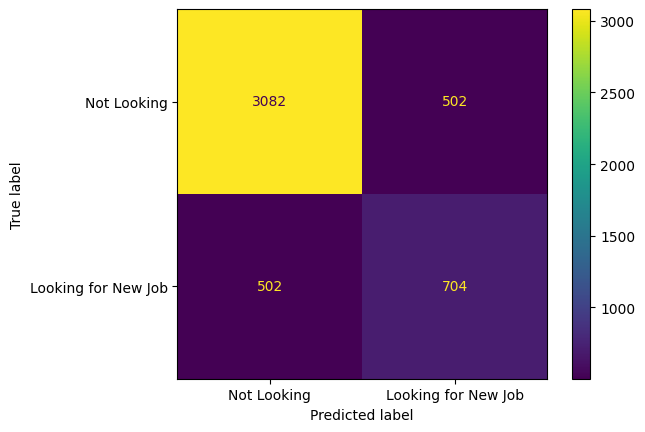

+---------------------------------------------------------+
|  Classification Report for Auto Sklearn Classification  |
+---------------------------------------------------------+
                     precision    recall  f1-score   support

        Not Looking       0.86      0.86      0.86      3584
Looking for New Job       0.58      0.58      0.58      1206

           accuracy                           0.79      4790
          macro avg       0.72      0.72      0.72      4790
       weighted avg       0.79      0.79      0.79      4790



In [34]:
metrics_evaluation("Auto Sklearn Classification",
                       y_test,
                       predictions)

### Notes & Other Takeaways From This Project

****
- Although the model is not where I would like it to be, one positive to take away from this project is that the recall and precision are balanced perfectly.
- While the model was not where I want it, I would not throw away what is here. With an additional feature or two as well as a few more samples to work with, I could see this model quickly becoming robust.

****

### Citations

- Auto-Sklearn
    > @inproceedings{feurer-neurips15a, title = {Efficient and Robust Automated Machine Learning}, author = {Feurer, Matthias and Klein, Aaron and Eggensperger, Katharina and Springenberg, Jost and Blum, Manuel and Hutter, Frank}, booktitle = {Advances in Neural Information Processing Systems 28 (2015)}, pages = {2962--2970}, year = {2015}}

    > @article{feurer-arxiv20a, title = {Auto-Sklearn 2.0: Hands-free AutoML via Meta-Learning}, author = {Feurer, Matthias and Eggensperger, Katharina and Falkner, Stefan and Lindauer, Marius and Hutter, Frank}, journal = {arXiv:2007.04074 [cs.LG]}, year = {2020},}